In [4]:
import pandas as pd
from auxiliary import *
import zipfile
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller

%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)

In [5]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [6]:
wide = pd.read_csv('data/result.csv')
wide.head()

,country,isocode,patience,risktaking,posrecip,negrecip,altruism,trust,demo2019,demo2018,...,oda2011,oda2012,oda2013,oda2014,oda2015,oda2016,oda2017,oda2018,oda2019,aid_boolean
0,Afghanistan,AFG,-0.201360,0.120764,0.289641,0.254712,0.166455,0.315964,2.85,2.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,Algeria,DZA,0.059815,0.391530,-0.598255,0.254901,-0.009968,-0.177371,4.01,3.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,Argentina,ARG,-0.229308,0.041503,0.159679,-0.140457,0.027347,-0.206733,7.02,7.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,Australia,AUS,0.657004,0.137137,0.069660,0.022190,0.155331,0.298973,9.09,9.09,...,4.982910e+09,5.402700e+09,4.845550e+09,4.382420e+09,3.493610e+09,3.277520e+09,NaN,NaN,NaN,True
4,Austria,AUT,0.608285,-0.061829,0.161047,-0.055415,-0.035363,0.154628,8.29,8.29,...,1.111370e+09,1.105750e+09,1.171490e+09,1.234520e+09,1.323510e+09,1.635480e+09,NaN,NaN,NaN,True


# generate long format

In [7]:
year_vary = ["demo", "funding", "pledge", "gdp", "funding_gdp", "gdpcapita", "govexpense", "pop", "oda"]
long = pd.wide_to_long(wide, year_vary, i="isocode", j="year")
long.head()

region  risktaking     trust  negrecip      country  \
isocode year                                                            
AFG     2003  South Asia    0.120764  0.315964  0.254712  Afghanistan   
        2004  South Asia    0.120764  0.315964  0.254712  Afghanistan   
        2005  South Asia    0.120764  0.315964  0.254712  Afghanistan   
        2006  South Asia    0.120764  0.315964  0.254712  Afghanistan   
        2007  South Asia    0.120764  0.315964  0.254712  Afghanistan   

              altruism  posrecip  aid_boolean income_type  patience  demo  \
isocode year                                                                
AFG     2003  0.166455  0.289641         True  Low income  -0.20136   NaN   
        2004  0.166455  0.289641         True  Low income  -0.20136   NaN   
        2005  0.166455  0.289641         True  Low income  -0.20136   NaN   
        2006  0.166455  0.289641         True  Low income  -0.20136  3.06   
        2007  0.166455  0.289641         True  Low income  -0.20136   NaN   

               funding  pledge           gdp  funding_gdp   gdpcapita  \
isocode year                                                            
AFG     2003       NaN     NaN  4.515559e+09          NaN  190.683814   
        2004       NaN     NaN  5.226779e+09          NaN  211.382117   
        2005  500000.0     NaN  6.209138e+09       0.0081  242.031285   
        2006       NaN     NaN  6.971286e+09          NaN  263.733692   
        2007       NaN     NaN  9.747880e+09          NaN  359.693238   

              govexpense         pop  oda  
isocode year                               
AFG     2003      11.927  23680871.0  NaN  
        2004      15.069  24726684.0  NaN  
        2005      15.698  25654277.0  NaN  
        2006      18.303  26433049.0  NaN  
        2007      21.478  27100536.0  NaN

# draw yearly varied variable by country over years to see whether there is a trend exist 

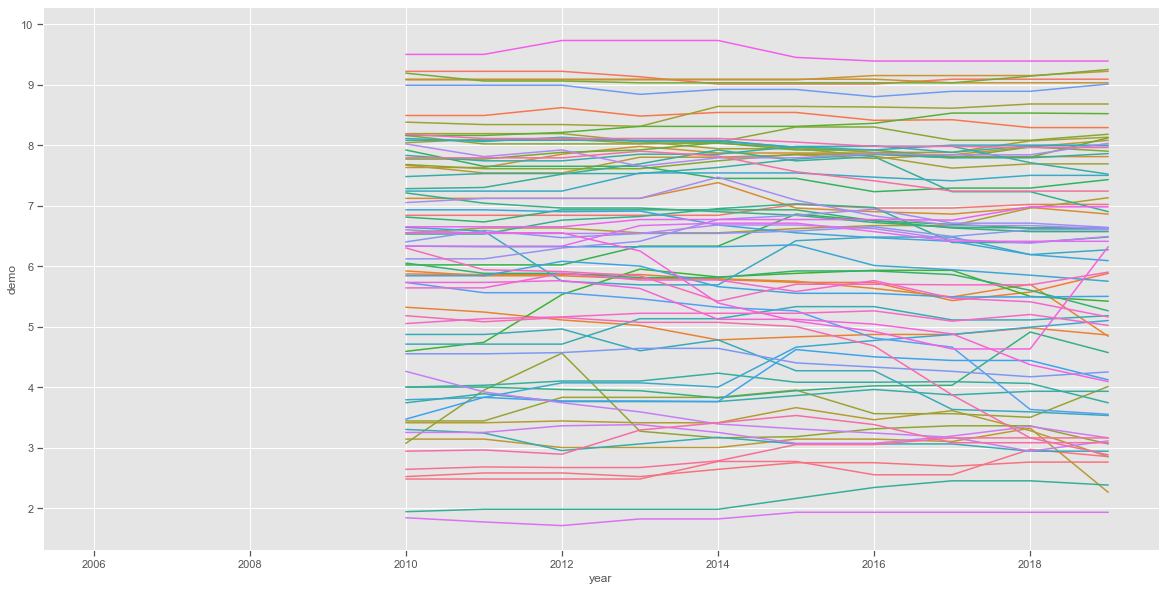

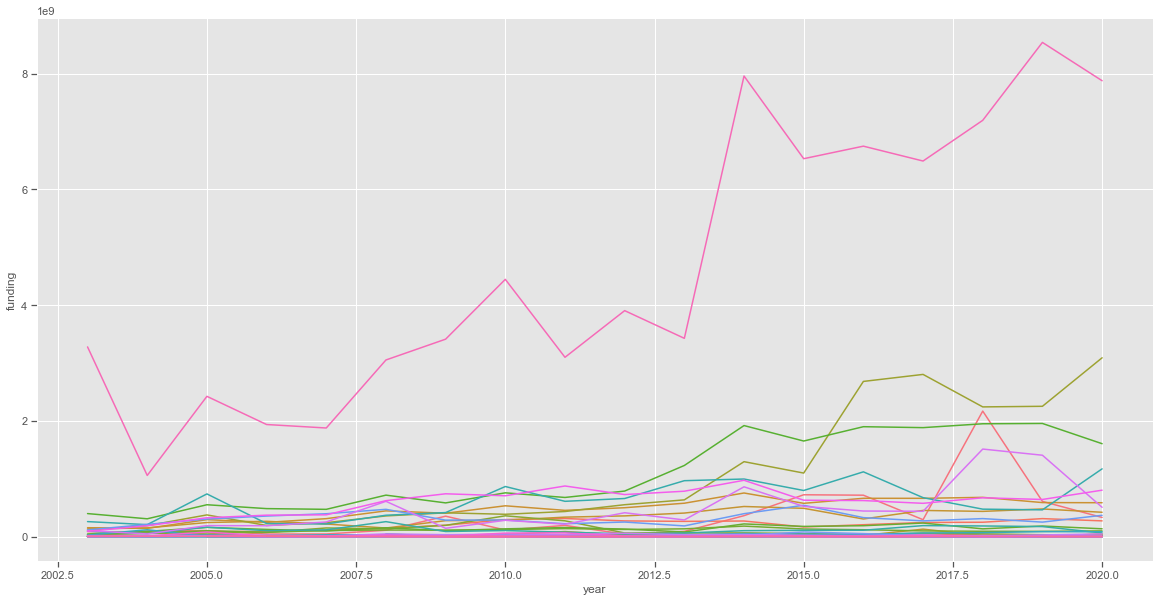

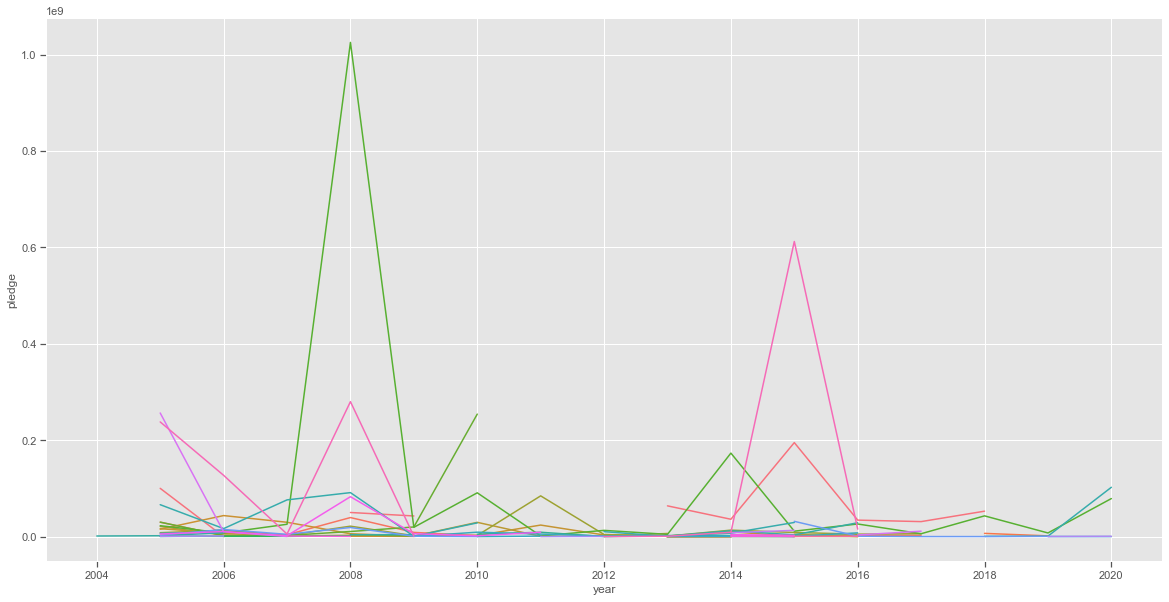

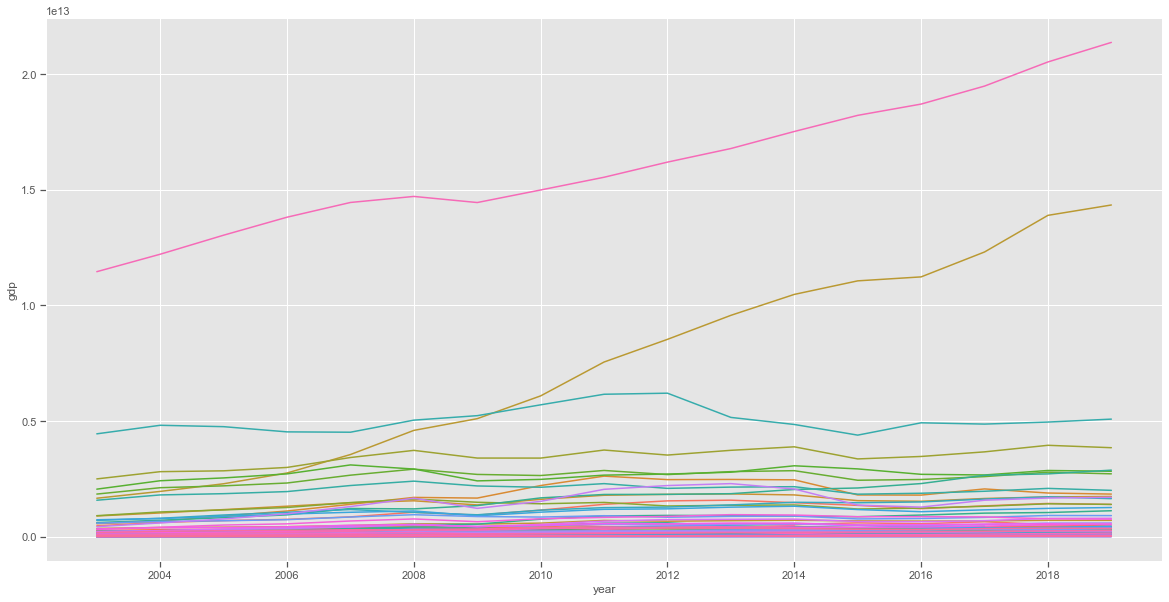

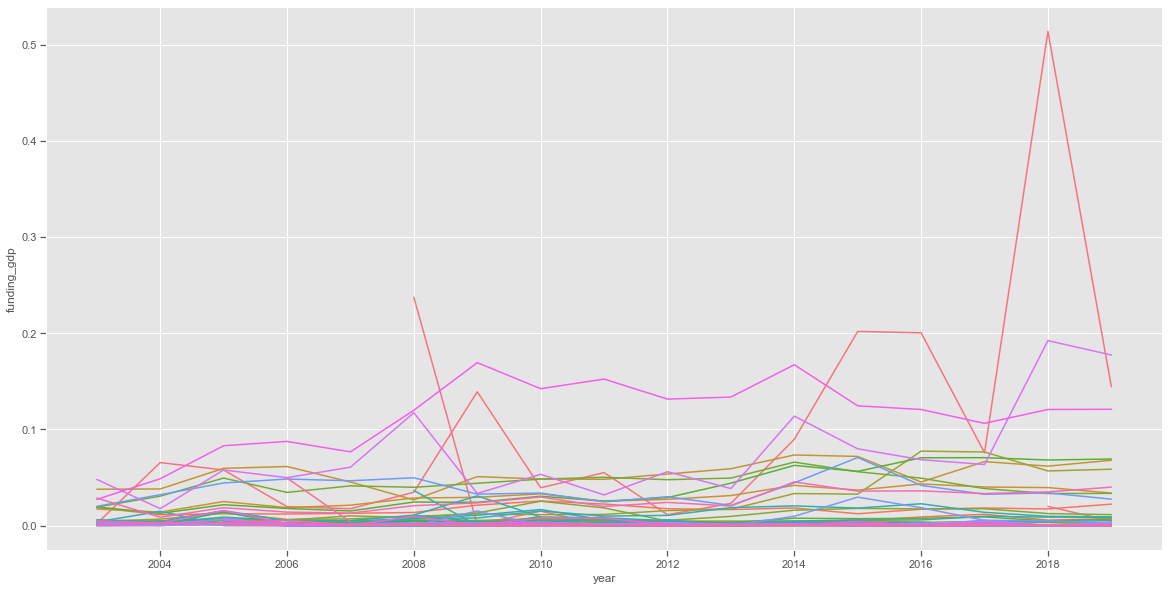

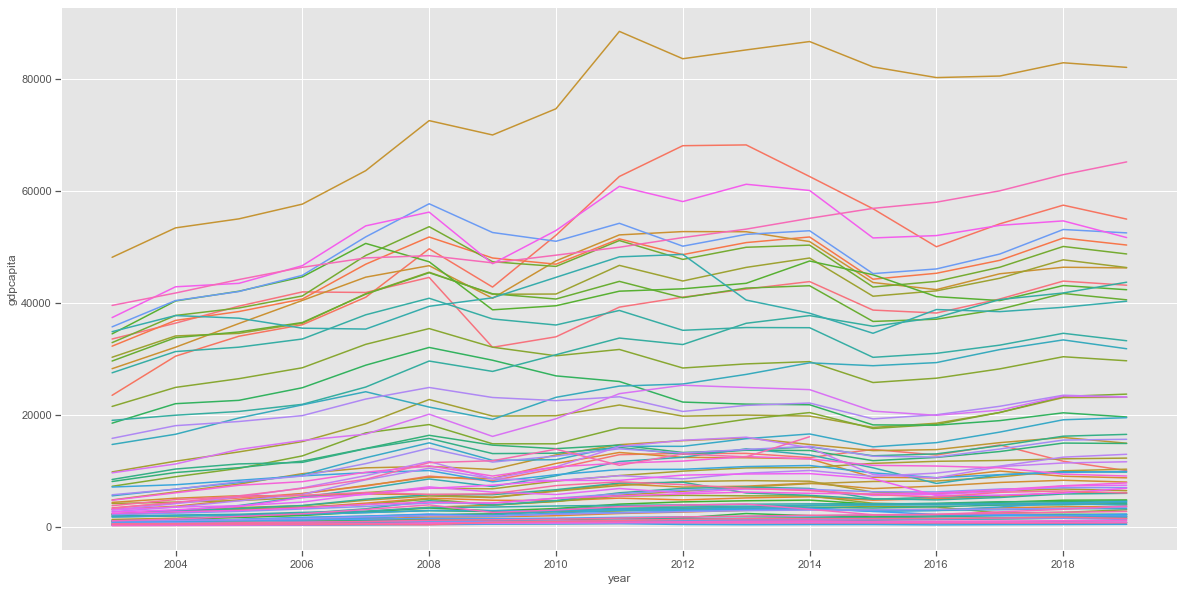

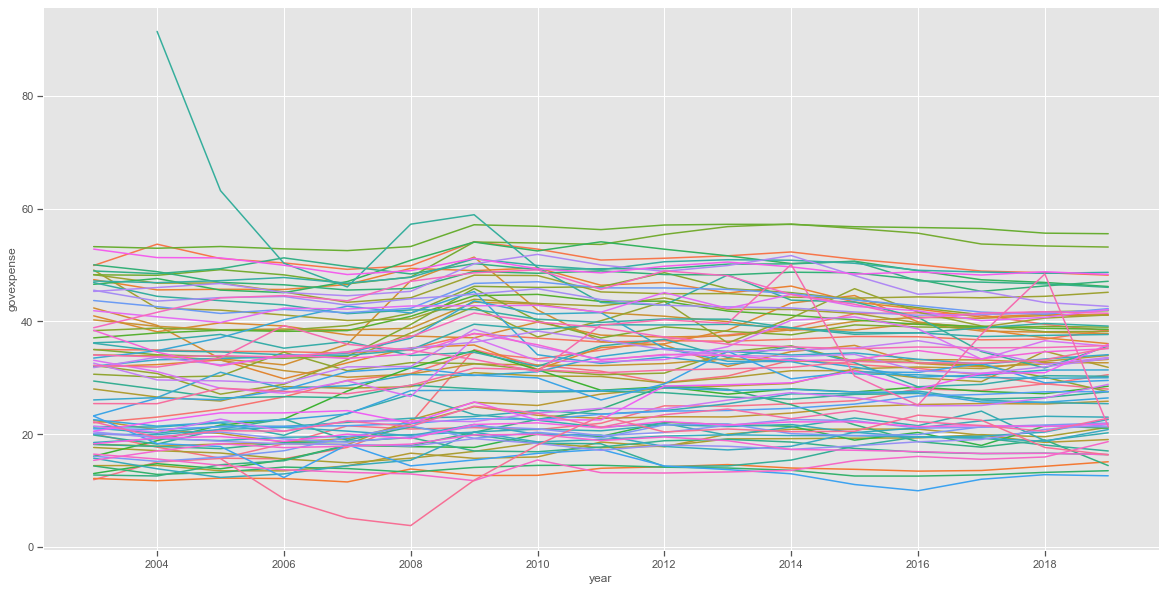

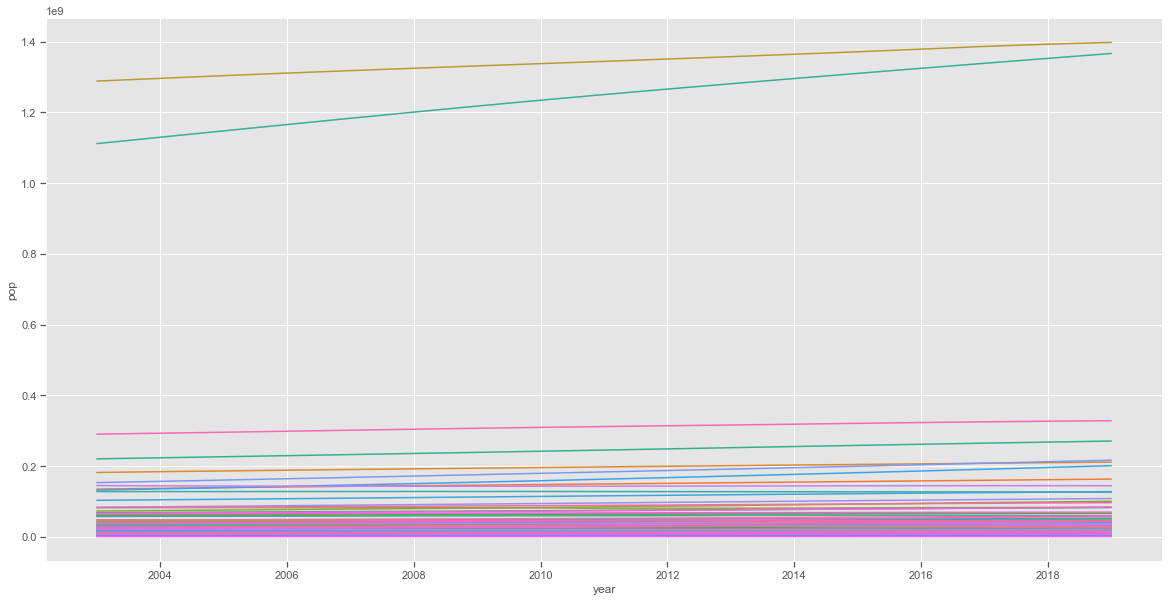

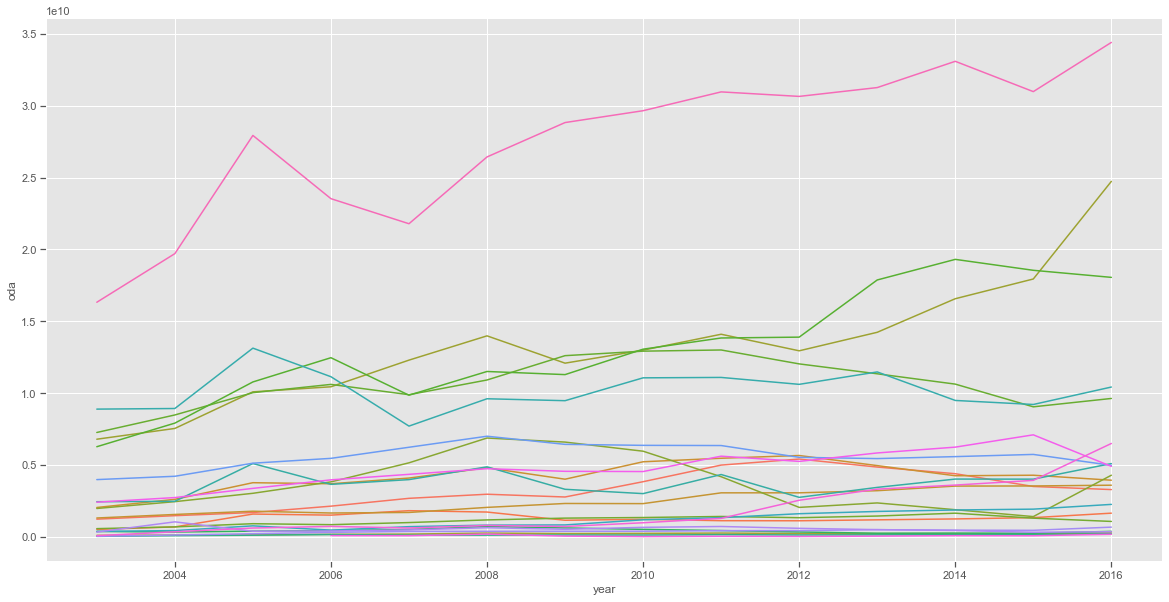

In [8]:
for i in year_vary:
    plt.figure()
    sns.lineplot(x="year", y= i, hue="country",  data=long, legend=False)


# plot distribution of yearly varied variable to see whether it is skewed

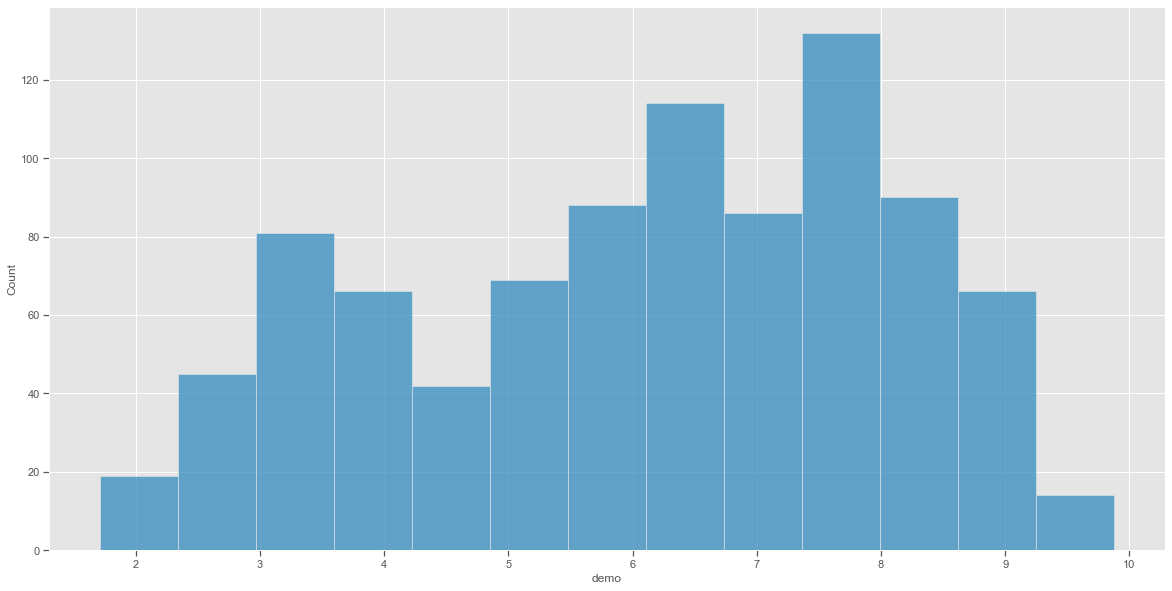

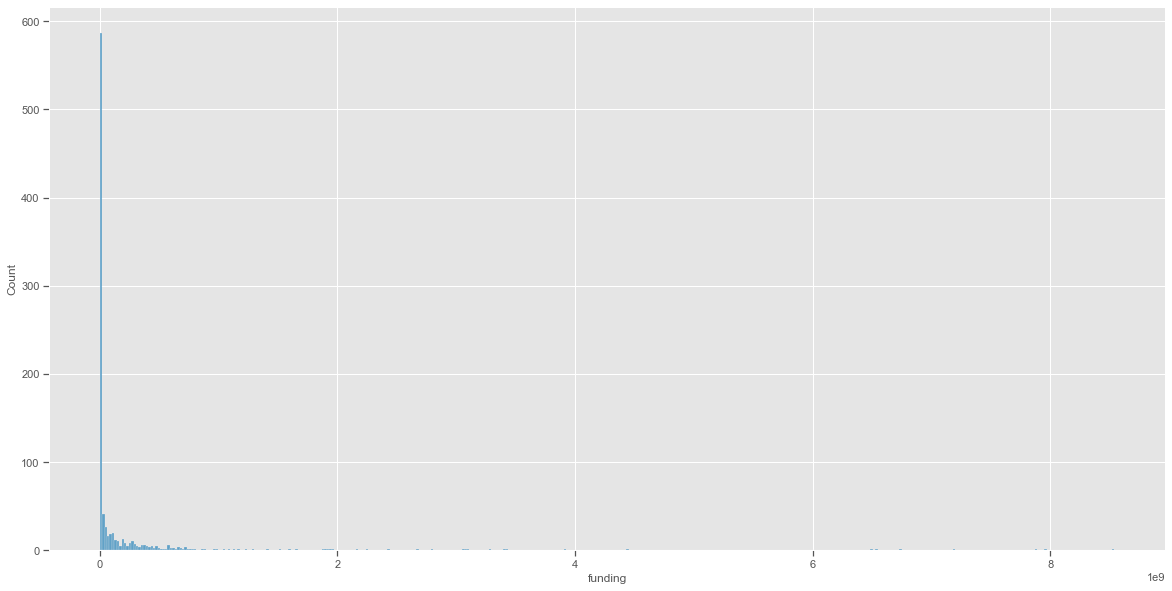

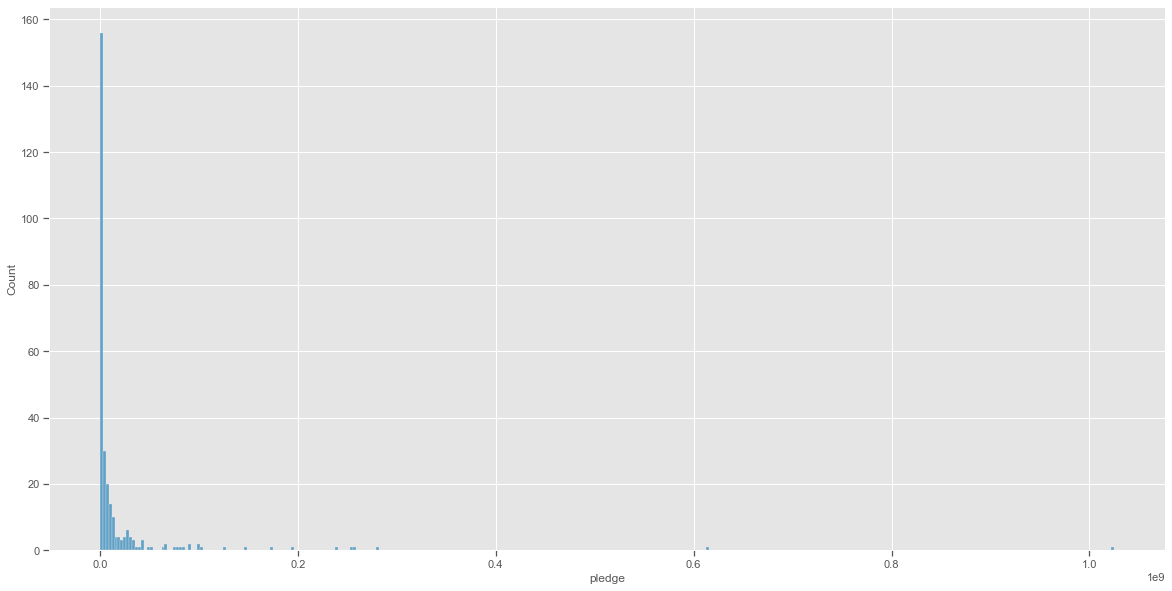

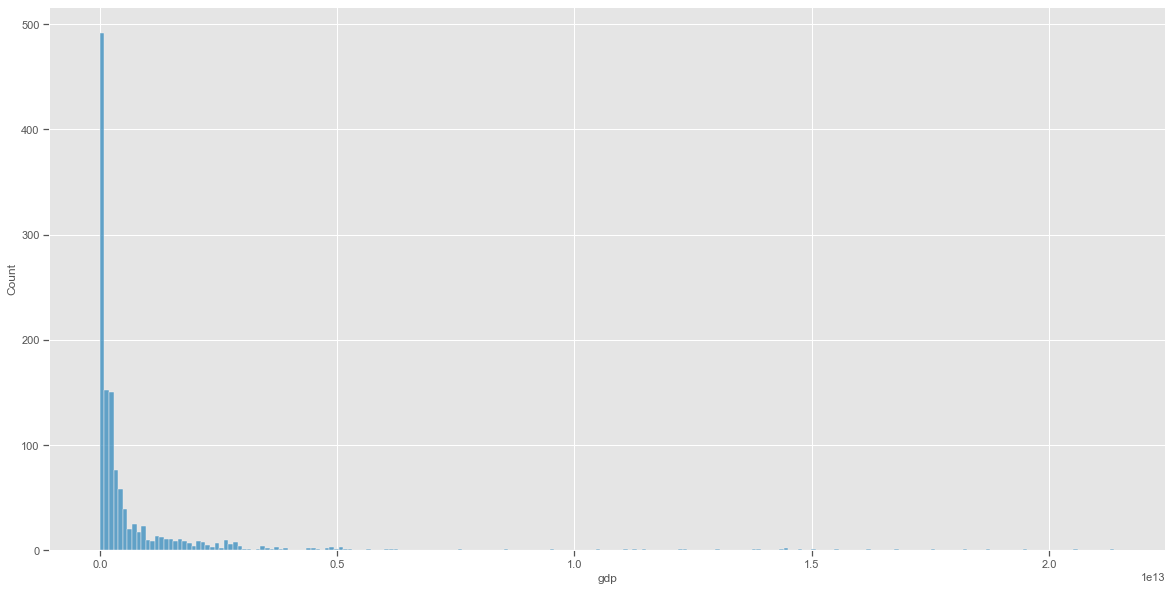

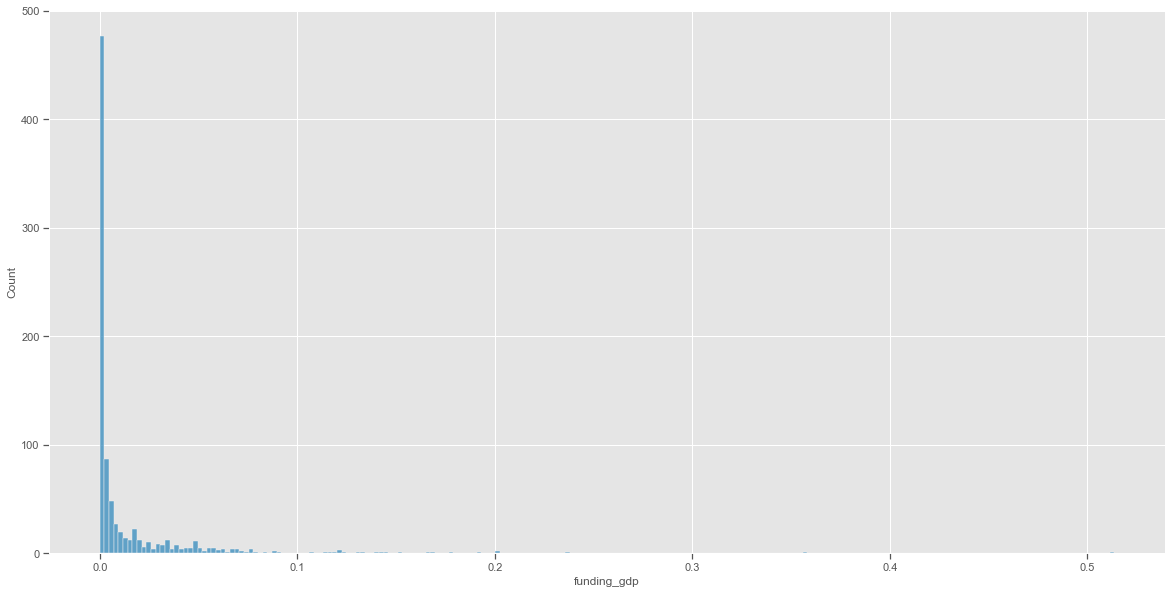

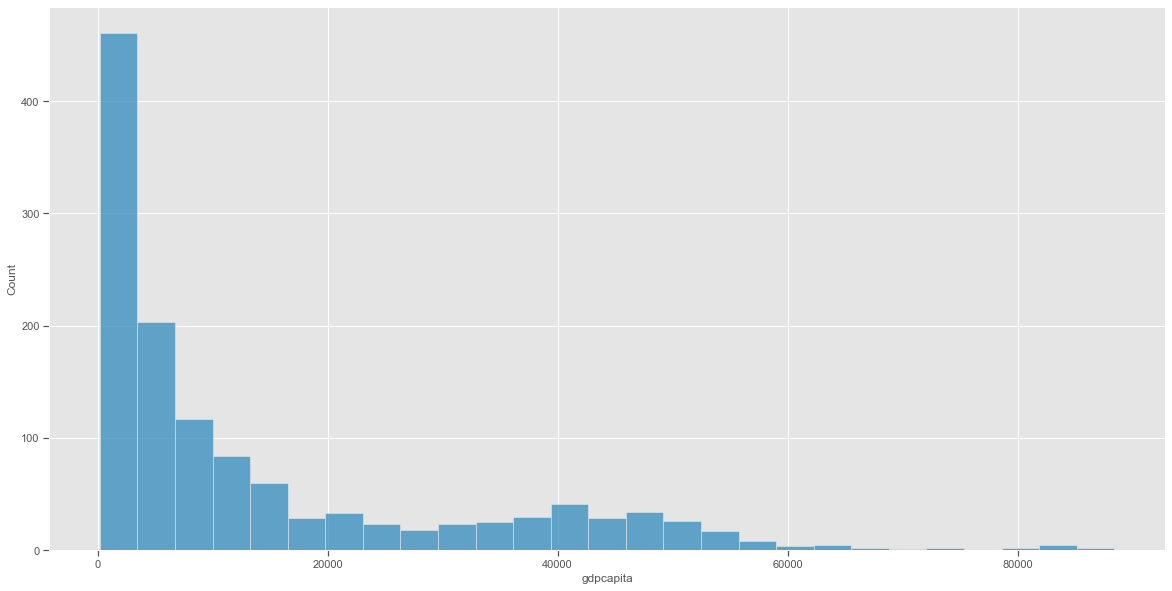

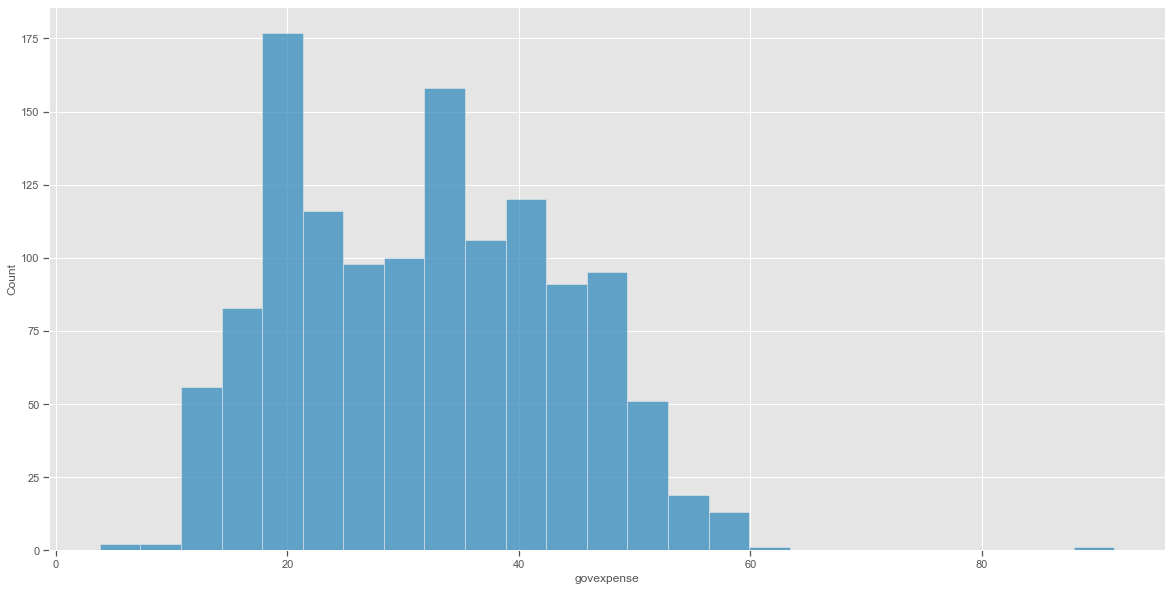

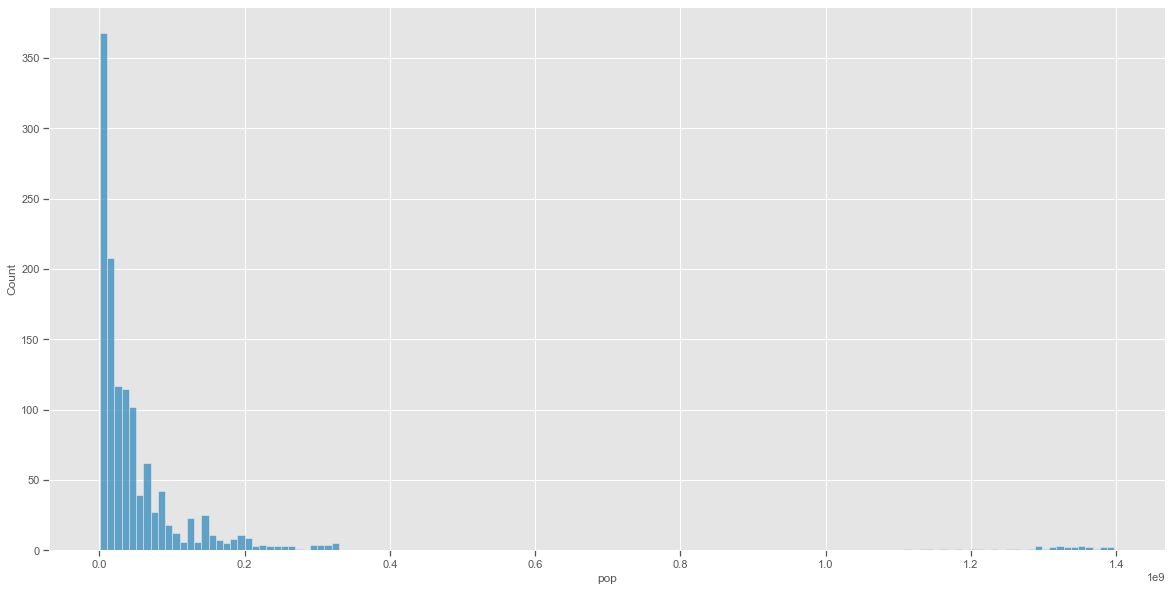

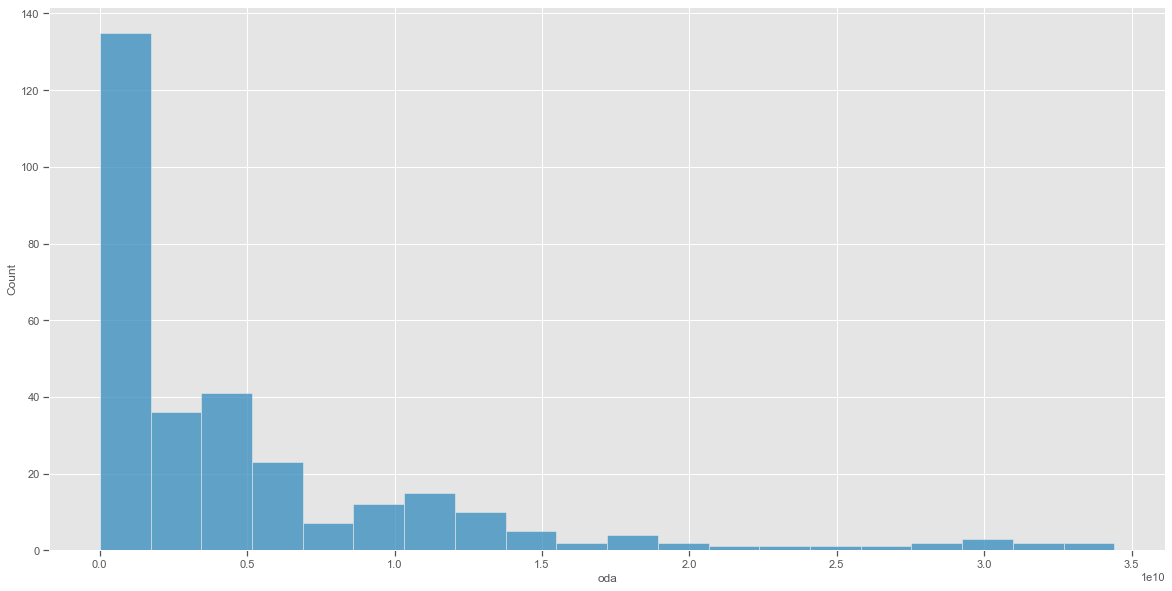

In [9]:
for i in year_vary:
    # long_dropna = long.dropna(subset=[i])
    plt.figure()
    sns.histplot(data=long, x=i)



# split data into 3 groups and examine sample mean and variance

In [10]:
for i in year_vary:
    sample3(i, long)

demo
[6.14 5.99 6.32]
[4.23 3.94 3.63]
funding
[2.58709335e+08 1.75643651e+08 2.41118015e+08]
[9.25104820e+17 4.24034132e+17 6.26136043e+17]
pledge
[18489279.66 20763255.27 23827652.58]
[2.09698227e+15 8.72989727e+15 6.23460968e+15]
gdp
[8.50917615e+11 8.70888358e+11 6.80720872e+11]
[4.96288533e+24 5.24188356e+24 4.01838877e+24]
funding_gdp
[0.01 0.01 0.01]
[0. 0. 0.]
gdpcapita
[16234.22 13436.47 14519.02]
[3.27215750e+08 2.88778964e+08 3.04013692e+08]
govexpense
[31.32 32.19 31.62]
[137.82 142.24 122.74]
pop
[81252518.48 82931324.07 72033948.99]
[4.54334015e+16 4.74874026e+16 3.39161798e+16]
oda
[4.70915094e+09 5.79208824e+09 4.09617067e+09]
[3.46807940e+19 5.81962132e+19 3.23011467e+19]


# augmented Dickey-Fuller test for stationary

In [11]:
for i in year_vary:
    adf_test = adfuller(long[i].dropna())
    if adf_test[1] > 0.01:
        print(f'{i} cannot reject H0:data is non-stationary')


oda cannot reject H0:data is non-stationary
